# Predict chance of getting admission into University
### Problem statement
Determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
### Dataset
| Exam 1 Score      | Exam 2 Score      | Admission |
|-------------------|-------------------|-----------|
| 34.62365962451697 | 78.0246928153624  | 0         |
| 30.28671076822607 | 43.89499752400101 | 0         |
| 60.18259938620976 | 86.30855209546826 | 1         |

Now we have to predict chance of getting admission into university (including which is not mention in our example dataset).

**Note:This problem statement and dataset is from coursera Andrew ng machine learning [Coursework](https://www.coursera.org/learn/machine-learning)**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# supress scientific value
np.set_printoptions(suppress=True) 

In [2]:
data = np.loadtxt("ex2data1.txt",dtype=np.float64,delimiter=",")
data[0:5,::]

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ]])

In [3]:
# split data into features and outputs
X = data[::,0:2]
Y = data[::,-1:]

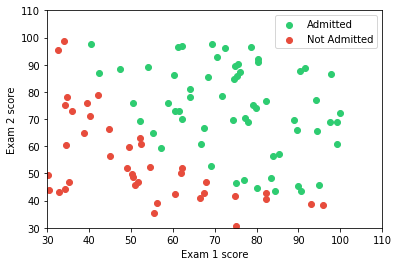

In [4]:
# Visualising the Dataset
X_get_admit = np.select([Y==1],[X])
X_not_admit = np.select([Y==0],[X])
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.xlim(30,110)
plt.ylim(30,110)
plt.scatter(X_get_admit[::,0:1],X_get_admit[::,-1:],label="Admitted",color="#2ecc71" )
plt.scatter(X_not_admit[::,0:1],X_not_admit[::,-1:],label="Not Admitted",color="#e74c3c")
plt.legend(loc = "upper right",frameon=True)
plt.show()


In [5]:
# sigmoid function
def sigmoid(Z):
    return (1/(1+np.exp(-Z)))

# hypothesis with sigmoid
def hypothesis(X_bias,Theta):
    #here Theta is 1d convert it into 2d
    hx = X_bias.dot((Theta.reshape((1,3))).transpose())
    return sigmoid(hx)
    

In [6]:
# cost function
def cost(Theta,X_bias,Y):
    m,n = X_bias.shape
    hx = (hypothesis(X_bias,Theta))
    first = np.multiply(-Y,np.log(hx))
    second = np.multiply((1-Y),np.log(1-hx))
    return (1.0/m)*np.sum(first - second)

In [7]:
m,n = X.shape
Theta = np.zeros(n+1)
X_bias = np.ones((m,n+1))
X_bias[::,1:] = X
cost(Theta,X_bias,Y)

0.69314718055994529

In [8]:
# gradient finding method used for advance optimization algorithm
def gradient(Theta,X_bias,Y):
    m,n = X_bias.shape
    grad = np.zeros(n) 
    hx = hypothesis(X_bias,Theta)
    error = hx -Y
    for i in xrange(n):
        element = np.multiply(error,X_bias[:,i].reshape((100,1)))
        grad[i] = np.sum(element)/len(X_bias)
    return grad    
gradient(Theta, X_bias, Y)

array([ -0.1       , -12.00921659, -11.26284221])

In [9]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X_bias,Y))
print result

(array([-25.16131862,   0.20623159,   0.20147149]), 36, 0)


In [10]:
Theta = result[0]
print Theta # result is 1d array convert it to 2d array for bug free calculation
print Theta.shape

[-25.16131862   0.20623159   0.20147149]
(3,)


In [11]:
cost(Theta, X_bias, Y)


0.20349770158947456

In [12]:
hx = hypothesis(X_bias,Theta)
# assume 1 if hx >= 0.5 and assume 0 if hx < 0.5
threshold = 0.5
prediction = np.select([hx >= threshold, hx < threshold],[1,0])
final_error =  (np.sum(np.absolute(Y-prediction))/len(X))*100
print 'accuracy', (100-final_error),'% with threshold ',threshold

accuracy 89.0 % with threshold  0.5


In [13]:
# lets try with different threshold
threshold = 0.3
prediction = np.select([hx >= threshold, hx < threshold],[1,0])
final_error =  (np.sum(np.absolute(Y-prediction))/len(X))*100
print 'accuracy', (100-final_error),'% with threshold ',threshold

accuracy 92.0 % with threshold  0.3
